# Find a Solution Set using Multi-objective Optimization
[https://pymoo.org/getting_started/part_2.html](https://pymoo.org/getting_started/part_2.html)
## Implement the problem

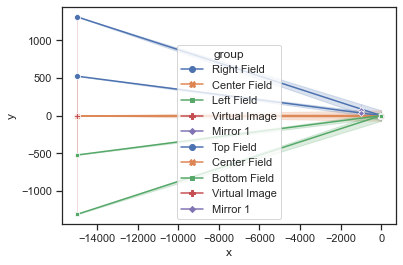

In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

from volume import TotalMechanicalVolumeOfHUD, MirrorFullHeight
from surplus_value import SurplusValue

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=7,
                        n_obj=1,
                        n_constr=0,
                        xl=np.array([5,2,10000,500,70,30,15]),
                        xu=np.array([15,6,30000,1500,210,90,45]))

    def _evaluate(self, x, out, *args, **kwargs):
        # f1 = TotalMechanicalVolumeOfHUD({
        #         "FullHorizontalFOV" : x[0],
        #         "FullVerticalFOV" : x[1],
        #         "VirtualImageDistance" : x[2],
        #         "EyeboxToMirror1" : x[3],
        #         "EyeboxFullWidth" : x[4],
        #         "EyeboxFullHeight" : x[5],
        #         "Mirror1ObliquityAngle" : x[6],
        #         "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
        #         "MechanicalVolumeIncrease" : 40,
        #         "M1M2OverlapFraction" : 0,
        #         "PGUVolumeEstimate" : 0.5})
        # f2 has to be negative to maximize the value
        f1 = - SurplusValue(
            x[0],
            x[1],
            MirrorFullHeight({
                "FullHorizontalFOV" : x[0],
                "FullVerticalFOV" : x[1],
                "VirtualImageDistance" : x[2],
                "EyeboxToMirror1" : x[3],
                "EyeboxFullWidth" : x[4],
                "EyeboxFullHeight" : x[5],
                "Mirror1ObliquityAngle" : x[6],
                "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
                "MechanicalVolumeIncrease" : 40,
                "M1M2OverlapFraction" : 0,
                "PGUVolumeEstimate" : 0.5}),
            TotalMechanicalVolumeOfHUD({
                "FullHorizontalFOV" : x[0],
                "FullVerticalFOV" : x[1],
                "VirtualImageDistance" : x[2],
                "EyeboxToMirror1" : x[3],
                "EyeboxFullWidth" : x[4],
                "EyeboxFullHeight" : x[5],
                "Mirror1ObliquityAngle" : x[6],
                "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
                "MechanicalVolumeIncrease" : 40,
                "M1M2OverlapFraction" : 0,
                "PGUVolumeEstimate" : 0.5}),
        )

        # g1 has to be negative to make the volume constraint >= 0
        # g1 = - TotalMechanicalVolumeOfHUD({
        #         "FullHorizontalFOV" : x[0],
        #         "FullVerticalFOV" : x[1],
        #         "VirtualImageDistance" : x[2],
        #         "EyeboxToMirror1" : x[3],
        #         "EyeboxFullWidth" : x[4],
        #         "EyeboxFullHeight" : x[5],
        #         "Mirror1ObliquityAngle" : x[6],
        #         "HUD_SCREEN_10x5_FOV_BASELINE_WIDTH" : 70,
        #         "MechanicalVolumeIncrease" : 40,
        #         "M1M2OverlapFraction" : 0,
        #         "PGUVolumeEstimate" : 0.5})
        # g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1]
        # out["G"] = [g1]


problem = MyProblem()

## Initialize an Algorithm

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=200,
    n_offsprings=50,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

## Define a Termination Criterion

In [3]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 200)

## Optimize

In [4]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |     200 |       1 |            - |            -
    2 |     250 |       1 |  0.045468128 |        ideal
    3 |     300 |       1 |  1.500613759 |        ideal
    4 |     350 |       1 |  0.00000E+00 |            f
    5 |     400 |       1 |  0.608537358 |        ideal
    6 |     450 |       1 |  0.00000E+00 |            f
    7 |     500 |       1 |  1.006296633 |        ideal
    8 |     550 |       1 |  0.295598443 |        ideal
    9 |     600 |       1 |  0.00000E+00 |            f
   10 |     650 |       1 |  1.327948590 |        ideal
   11 |     700 |       1 |  0.165343761 |        ideal
   12 |     750 |       1 |  0.00000E+00 |            f
   13 |     800 |       1 |  0.837931227 |        ideal
   14 |     850 |       1 |  0.00000E+00 |            f
   15 |     900 |       1 |  0.056811571 |        ideal
   16 |     950 |       1 |  0.00000E+00 |            f
   17 |    1000 |       1 |  0.743650445 |      

## Visualize

In [5]:
import matplotlib.pyplot as plt
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 504x360 with 0 Axes>

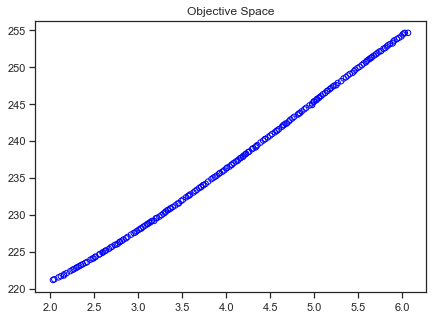

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], -F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

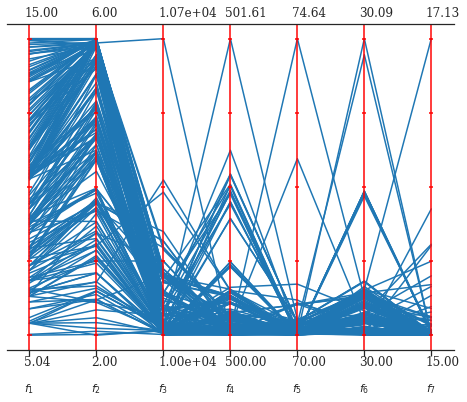

In [ ]:
from pymoo.visualization.pcp import PCP
PCP().add(X).show()

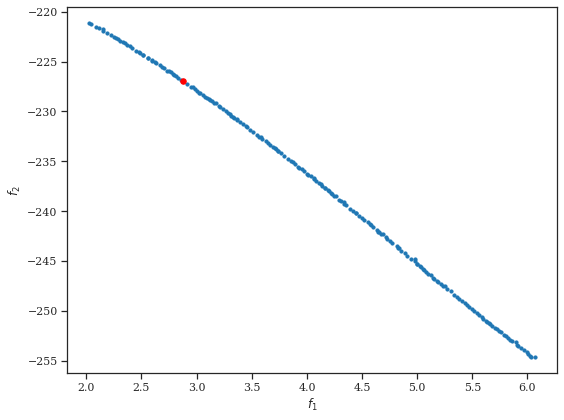

In [ ]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(tight_layout=True)
plot.add(F, s=10)
plot.add(F[10], s=30, color="red")
plot.show()

In [ ]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video

# use the video writer as a resource
with Recorder(Video("ga.mp4",fps=30)) as rec:

    # for each algorithm object in the history
    for entry in res.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen))
        sc.add(entry.pop.get("F"))
        sc.add(entry.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
        sc.do()

        # finally record the current visualization to the video
        rec.record()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X, columns = ['FullHorizontalFOV',
                                    'FullVerticalFOV',
                                    'VirtualImageDistance',
                                    'EyeboxToMirror1',
                                    'EyeboxFullWidth',
                                    'EyeboxFullHeight',
                                    'Mirror1ObliquityAngle'])

df.head()

,FullHorizontalFOV,FullVerticalFOV,VirtualImageDistance,EyeboxToMirror1,EyeboxFullWidth,EyeboxFullHeight,Mirror1ObliquityAngle
0,14.998869,5.999798,10021.884376,500.031081,74.637465,30.011446,15.014196
1,5.036098,2.015042,10009.554805,500.109509,70.008348,30.013096,15.016487
2,9.289949,4.707735,10013.251149,500.372166,70.014063,30.001479,15.006125
3,12.815925,5.894931,10016.157113,500.874638,70.196112,30.013258,15.001824
4,5.439305,2.004625,10010.480617,500.020187,70.180656,30.013732,15.006239


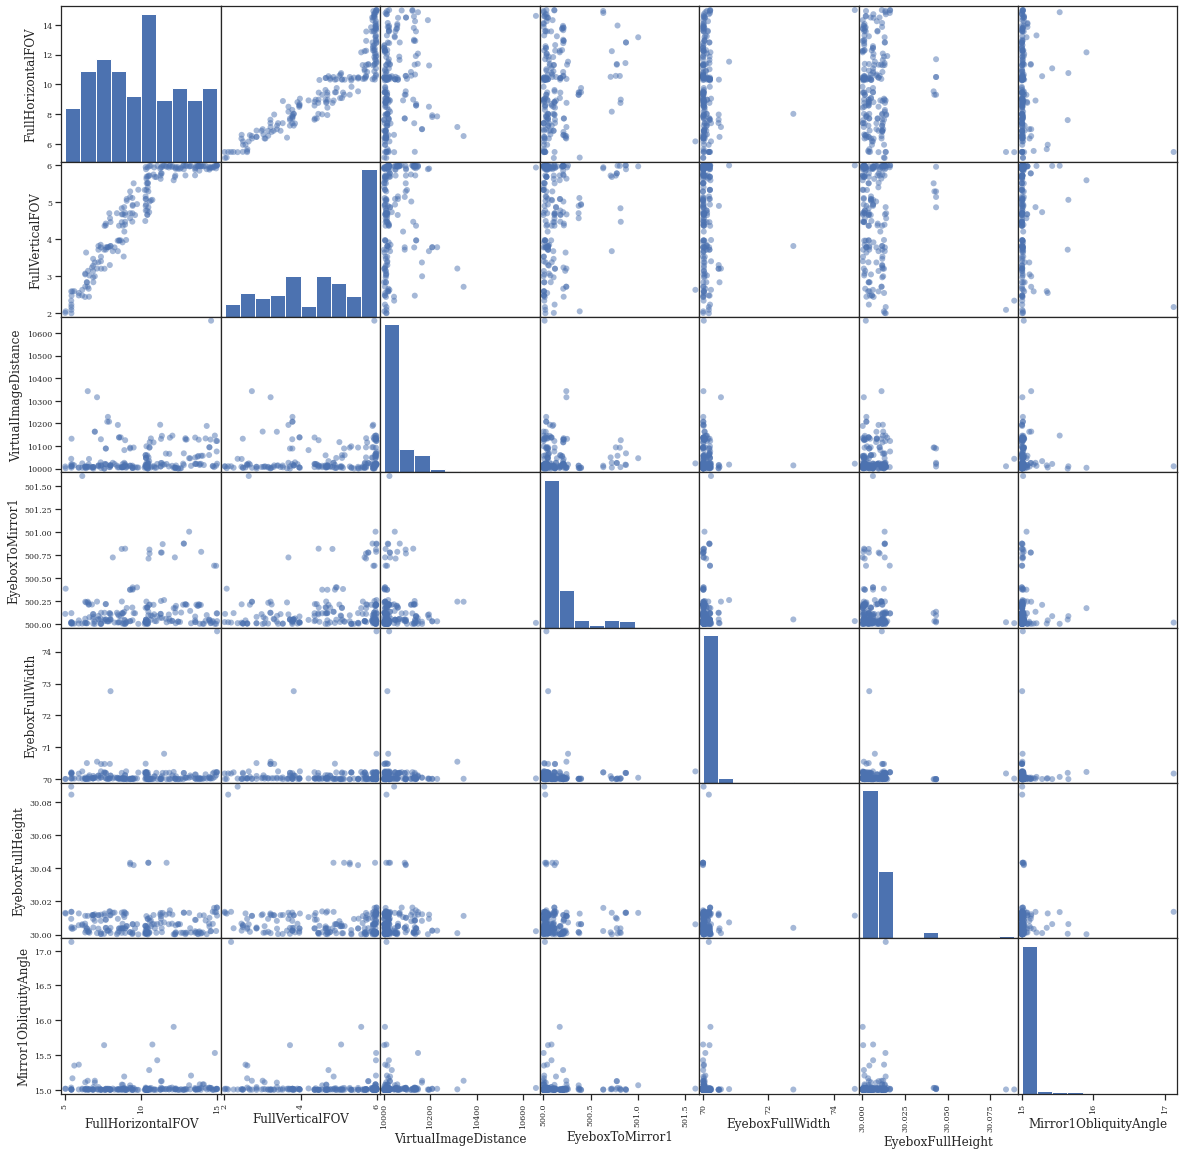

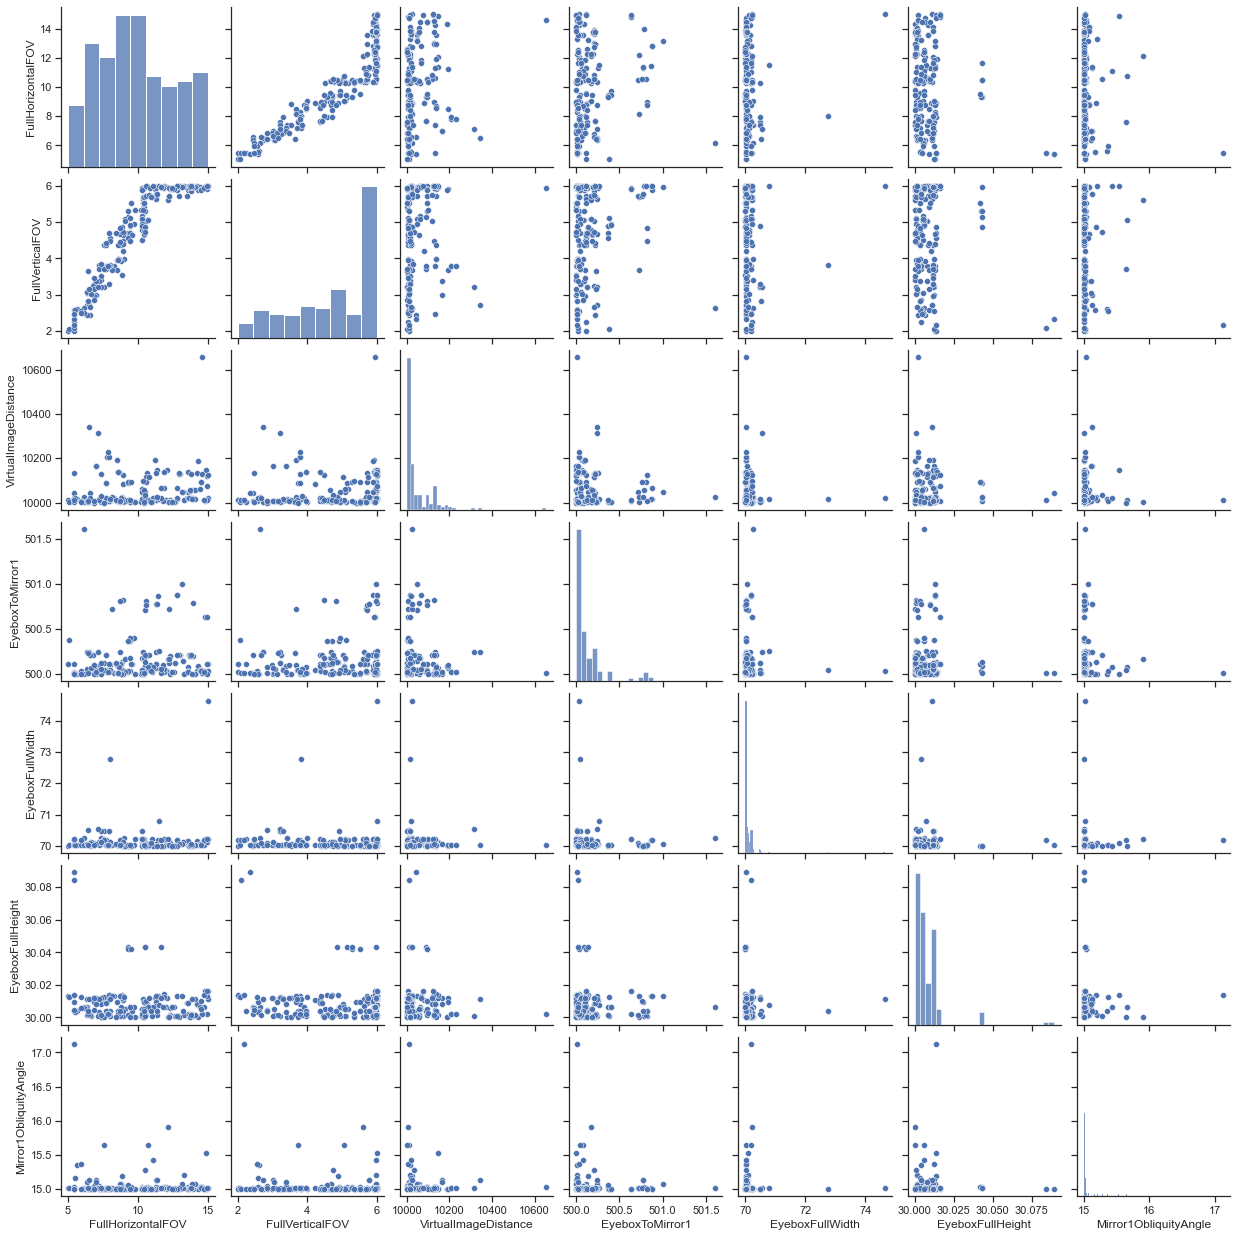

In [ ]:
# plot scatter matrix using pandas and matplotlib
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True, marker='o')

# plot scatter matrix using seaborn
sns.set_theme(style="ticks")
sns.pairplot(df)

In [ ]:
len(F[0])

2

In [6]:
res.F

array([-254.60768273])

In [7]:
res.X

array([1.49999693e+01, 5.99991590e+00, 1.00000008e+04, 5.00000031e+02,
       7.63973365e+01, 3.00000027e+01, 1.50000096e+01])

In [9]:
for i in res.X:
    print(f"{i:.2f}")

15.00
6.00
10000.00
500.00
76.40
30.00
15.00
